# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2: Линейные модели


###### <hr\>
**Общая информация**

**Срок сдачи:** 05 апреля 18:00 Сдача **очная** на онлайн занятии. <br\>


Используйте данный Ipython Notebook при оформлении домашнего задания.

Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0920, Задание 2] Фамилия Имя.



**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw2.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. В противном случае -1 балл
<hr\>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

Здравствуйте, уважаемые студенты! 

В этом задании мы будем реализовать линейные модели. Необходимо реализовать линейную и логистическую регрессии с L2 регуляризацией

# Теоретическое введение



Линейная регрессия решает задачу регрессии и оптимизирует функцию потерь MSE 

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right], $$ где $y_i$ $-$ целевая функция,  $a_i = a(x_i) =  \langle\,x_i,w\rangle ,$ $-$ предсказание алгоритма на объекте $x_i$, $w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Не забываем, что здесь и далее  мы считаем, что в $x_i$ есть тождественный вектор единиц, ему соответствует вес $w_0$.


Логистическая регрессия является линейным классификатором, который оптимизирует так называемый функционал log loss:

$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right],$$
где  $y_i  \in \{0,1\}$ $-$ метка класса, $a_i$ $-$ предсказание алгоритма на объекте $x_i$. Модель пытается предсказать апостериорую вероятность объекта принадлежать к классу "1":
$$ p(y_i = 1 | x_i) = a(x_i) =  \sigma( \langle\,x_i,w\rangle ),$$
$w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Функция $\sigma(x)$ $-$ нелинейная функция, пероводящее скалярное произведение объекта на веса в число $\in (0,1)$ (мы же моделируем вероятность все-таки!)

$$\sigma(x) = \frac{1}{1 + \exp(-x)}$$

Если внимательно посмотреть на функцию потерь, то можно заметить, что в зависимости от правильного ответа алгоритм штрафуется или функцией $-\log a_i$, или функцией $-\log (1 - a_i)$.



Часто для решения проблем, которые так или иначе связаны с проблемой переобучения, в функционал качества добавляют слагаемое, которое называют ***регуляризацией***. Итоговый функционал для линейной регрессии тогда принимает вид:

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right] + \frac{1}{C}R(w) $$

Для логистической: 
$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w)$$

Самое понятие регуляризации введено основателем ВМК академиком Тихоновым https://ru.wikipedia.org/wiki/Метод_регуляризации_Тихонова

Идейно методика регуляризации заключается в следующем $-$ мы рассматриваем некорректно поставленную задачу (что это такое можно найти в интернете), для того чтобы сузить набор различных вариантов (лучшие из которых будут являться переобучением ) мы вводим дополнительные ограничения на множество искомых решений. На лекции Вы уже рассмотрели два варианта регуляризации.

$L1$ регуляризация:
$$R(w) = \sum_{j=1}^{D}|w_j|$$
$L2$ регуляризация:
$$R(w) =  \sum_{j=1}^{D}w_j^2$$

С их помощью мы ограничиваем модель в  возможности выбора каких угодно весов минимизирующих наш лосс, модель уже не сможет подстроиться под данные как ей угодно. 

Вам нужно добавить соотвествущую Вашему варианту $L2$ регуляризацию.

И так, мы поняли, какую функцию ошибки будем минимизировать, разобрались, как получить предсказания по объекту и обученным весам. Осталось разобраться, как получить оптимальные веса. Для этого нужно выбрать какой-то метод оптимизации.



Градиентный спуск является самым популярным алгоритмом обучения линейных моделей. В этом задании Вам предложат реализовать стохастический градиентный спуск или  мини-батч градиентный спуск (мини-батч на русский язык довольно сложно перевести, многие переводят это как "пакетный", но мне не кажется этот перевод удачным). Далее нам потребуется определение **эпохи**.
Эпохой в SGD и MB-GD называется один проход по **всем** объектам в обучающей выборки.
* В SGD градиент расчитывается по одному случайному объекту. Сам алгоритм выглядит примерно так:
        1) Перемешать выборку
        2) Посчитать градиент функции потерь на одном объекте (далее один объект тоже будем называть батчем)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* В Mini Batch SGD - по подвыборке объектов. Сам алгоритм выглядит примерно так::
        1) Перемешать выборку, выбрать размер мини-батча (от 1 до размера выборки)
        2) Почитать градиент функции потерь по мини-батчу (не забыть поделить на  число объектов в мини-батче)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* Для отладки алгоритма реализуйте возможность  вывода средней ошибки на обучении модели по объектам (мини-батчам). После шага градиентного спуска посчитайте значение ошибки на объекте (или мини-батче), а затем усредните, например, по ста шагам. Если обучение проходит корректно, то мы должны увидеть, что каждые 100 шагов функция потерь уменьшается. 
* Правило останова - максимальное количество эпох
    


# Теоретические вопросы (2 балла)
В этой части Вам будут предложены теоретичские вопросы и задачи по теме. Вы, конечно, можете списать их у своего товарища или найти решение в интернете, но учтите, что они обязательно войдут в теоретический коллоквиум. Лучше разобраться в теме сейчас и успешно ответить на коллоквиуме, чем списать, не разобравшись в материале, и быть терзаемым совестью. 


Формулы надо оформлять в формате **LaTeX**.

Задача 1. Градиент для линейной регрессии.
* Выпишите формулу обновления весов для линейной регрессии с L2 регуляризацией для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент?

***Ваше решение здесь***
$$Q(w) =  \frac{1}{n}\left[\sum_{i} (y_i - <x_i,w>) ^ 2 \right] + \frac{1}{C}\sum_{j=1}^{D}w_j^2$$ 
$$Q(w) =  \frac{1}{n}\left[\sum_{i} (y_i - <x_i,w>) ^ 2 \right] + \frac{1}{C}<w,w>$$
$$\nabla_w Q(w) = \frac{1}{n}\left[\sum_{i} 2 * (<x_i,w> - y_i ) * x_i \right] + \frac{2}{C}w$$
$$w_{new} = w_{old} - \alpha * 2 * \left(\frac{1}{n}\left[\sum_{i} (<x_i,w_{old}> - y_i) * x_i \right] + \frac{1}{C} w_{old}\right)$$

Градиент равен сумме вектора весов деленный на некоторую константу и среднее тех объектов, которые были выбраны для обновления весов, домноженные на отклонение в предсказании

Задача 2. Градиент для логистической регрессии.
* Выпишите формулу обновления весов для логистической регрессии с L2 регуляризацией  для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент? Как соотносится этот градиент с градиентом, возникающий в задаче линейной регрессии?

Подсказка: Вам градиент, которой получается если “в лоб” продифференцировать,  надо немного преобразовать.
Надо подставить, что $1 - \sigma(w,x) $ это  $1 - a(x_i)$, а  $-\sigma(w,x)$ это $0 - a(x_i)$.  Тогда получится свести к одной красивой формуле с линейной регрессией, которую программировать будет намного проще.

***Ваше решение здесь***
$$Q(w) = - \frac{1}{n}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}\sum_{j=1}^{D}w_j^2$$
$$Q(w) =  \frac{1}{n}\left[\sum_i y_i \log (1 + e^{-(<x_i,w>)}) -(1 - y_i) \log\left(\frac{e^{-(<x_i,w>)}}{1 + e^{-(<x_i,w>)}}\right) \right] +  \frac{1}{C}\sum_{j=1}^{D}w_j^2$$
$$Q(w) =  \frac{1}{n}\left[\sum_i y_i \log (1 + e^{-(<x_i,w>)}) + ( 1 - y_i) \left(<x_i,w> + \log\left(1 + e^{-(<x_i,w>)}\right)\right) \right] + \frac{1}{C} <w,w>$$
$$Q(w) =  \frac{1}{n}\left[\sum_i \log (1 + e^{-(<x_i,w>)}) + ( 1 - y_i) * \left(<x_i,w>\right) \right] + \frac{1}{C} <w,w>$$
$$\nabla_w Q(w) = \frac{1}{n}\left[\sum_i \frac{e^{-(<x_i,w>)} * (-x_i)}{1 + e^{-(<x_i,w>)}} + (1 - y_i)*x_i\right] + \frac{2}{C}w$$
$$\nabla_w Q(w) = \frac{1}{n}\left[\sum_i \frac{x_i}{1 + e^{-(<x_i,w>)}}- y_i*x_i\right] + \frac{2}{C}w$$
$$\nabla_w Q(w) = \frac{1}{n}\left[\sum_i x_i*(\sigma(w,x_i)- y_i)\right]+ \frac{2}{C}w$$
$$w_{new} = w_{old} - \alpha * \left(\frac{1}{n}\left[\sum_i x_i*(\sigma(w_{old},x_i)- y_i)\right]+ \frac{2}{C}w_{old}\right)$$
Гессиан равен измененному вектору весов, градиент в данном случае очень похож на градиент в случае линейной регрессии

Задача 3. Точное решение линейной регрессии

На лекции было показано, что точное решение линейной регрессии имеет вид $w = (X^TX)^{-1}X^TY $. 
* Покажите, что это действительно является точкой минимума в случае, если матрица X имеет строк не меньше, чем столбцов и имеет полный ранг. Подсказка: посчитайте Гессиан и покажите, что в этом случае он положительно определен. 
* Выпишите точное решение для модели с $L2$ регуляризацией. Как L2 регуляризация помогает с точным решением где матрица X имеет линейно зависимые признаки?

***Ваше решение здесь***
$$Q(w) =  \frac{1}{N}\left[\sum_{i=1}^N (y_i - a_i) ^ 2 \right] $$
$$Q(w) =  \frac{1}{N}\left[\sum_{i=1}^N (y_i - <x_i,w>) ^ 2 \right] $$
$$Q(w) =  \frac{1}{N}\left|\left|Y - X*w \right|\right|^2 $$
$$\nabla_wQ(w) =\frac{1}{N}\left(\left(XX^T + XX^T\right)w - 2X^TY\right)$$
$$\nabla_w^2Q(w) = \frac{2}{N}XX^T -  Гессиан$$
$$\forall\ x_i \neq\ 0\ из\ X:\ <\frac{2}{N}XX^Tx_i,x_i>\ =\ \frac{2}{N}<X^Tx_i,X^Tx_i>\ >\ 0 - Гессиан\ положительно\ определен$$

Рассмотрим случай с L2 регуляризацией:
$$Q(w) =  \frac{1}{N}\left[\sum_{i=1}^N (y_i - a_i) ^ 2 \right] + \frac{1}{C}\sum_{j=1}^{D}w_j^2$$
$$Q(w) = \frac{1}{N}\left|\left|Xw - Y\right|\right|^2 + \frac{1}{C}w^Tw$$
$$\nabla_wQ(w) = \frac{1}{N}\left(\left(XX^T + XX^T\right)w - 2X^TY\right) + \frac{2}{C}Iw$$
$$\left(2XX^T + \frac{2N}{C}I\right)w - 2X^TY = 0$$
$$w =\left(XX^T + \frac{N}{C}I\right)^{-1}X^TY$$

Если матрица X имеет ЛЗ признаки, то она будет вырожденной, значит не будет обратимой по критерию. В случае L2 регуляризации, добавляется диагональная матрица с положительными элементами. В таком случае матрица будет обратимой.

Задача 4.  Предсказываем вероятности.

Когда говорят о логистической регрессии, произносят фразу, что она "предсказывает вероятности положительного класса". Давайте разберемся, что же за этим стоит. Посчитаем математическое ожидание функции потерь и проверим, что предсказание алгоритма, оптимизирующее это мат. ожидание, будет являться вероятностью положительного класса. 

И так, функция потерь на объекте $x_i$, который имеет метку $y_i \in \{0,1\}$  для предсказания $a(x_i)$ равна:
$$L(y_i, b) =-[y_i == 1] \log a(x_i)  - [y_i == 0] \log(1 - a(x_i)) $$

Где $[]$ означает индикатор $-$ он равен единице, если значение внутри него истинно, иначе он равен нулю. Тогда мат. ожидание при условии конкретного $x_i$  по определение мат. ожидания дискретной случайной величины:
$$E(L | x_i) = -p(y_i = 1 |x_i ) \log a(x_i)  - p(y_i = 0 | x_i) \log( 1 - a(x_i))$$
* Докажите, что значение $a(x_i)$, минимизирующее данное мат. ожидание, в точности равно $p(y_i = 1 |x_i)$, то есть равно вероятности положительного класса.

Подсказка: возможно, придется воспользоваться, что  $p(y_i = 1 | x_i) + p(y_i = 0 | x_i) = 1$

***Ваше решение здесь***
$$E(L | x_i) = -p(y_i = 1 |x_i ) \log a(x_i)  - p(y_i = 0 | x_i) \log( 1 - a(x_i))$$
$$E_a^{'} = \frac{-p(y_i = 1 |x_i )}{a} + \frac{p(y_i = 0 | x_i)}{1 - a}$$
$$E_a^{'} = \frac{-p(y_i = 1 |x_i )(1-a) + ap(y_i = 0 | x_i)}{a(1 - a)}$$
$$E_a^{'} = \frac{-p(y_i = 1 |x_i ) + a}{a(1 - a)} = 0$$
$$a^{*} = p(y_i = 1 |x_i ),\ чтд.$$

Задача 5.  Смысл регуляризации.

Нужно ли в L1/L2 регуляризации использовать свободный член $w_0$ (который не умножается ни на какой признак)?

Подсказка: подумайте, для чего мы вводим $w_0$

***Ваше решение здесь***
$$$$
Ответ: нет, не нужно. $w_0$ вводилось как значение, которому равно предсказание, когда все остальные признаки равны 0. Поэтому штрафовать за $w_0$ функцию не надо.

#  Реализация линейной модели (4 балла)

## Зачем нужны батчи?


Как Вы могли заметить из теоретического введения, что в случае SGD, что в случа mini-batch GD,  на каждой итерации обновление весов  происходит только по небольшой части данных (1 пример в случае SGD, batch примеров в случае mini-batch). То есть для каждой итерации нам *** не нужна вся выборка***. Мы можем просто итерироваться по выборке, беря батч нужного размера (далее 1 объект тоже будем называть батчом).

Легко заметить, что в этом случае нам не нужно загружать все данные в оперативную память, достаточно просто считать батч с диска, обновить веса, считать диска другой батч и так далее. В целях упрощения домашней работы, прямо с диска  мы считывать не будем, будем работать с обычными numpy array. 





## Немножко про генераторы в Python



Идея считывания данных кусками удачно ложится на так называемые ***генераторы*** из языка Python. В данной работе Вам предлагается не только разобраться с логистической регрессией, но  и познакомиться с таким важным элементом языка.  При желании Вы можете убрать весь код, связанный с генераторами, и реализовать логистическую регрессию и без них, ***штрафоваться это никак не будет***. Главное, чтобы сама модель была реализована правильно, и все пункты были выполнены. 

Подробнее можно почитать вот тут https://anandology.com/python-practice-book/iterators.html


К генератору стоит относиться просто как к функции, которая порождает не один объект, а целую последовательность объектов. Новое значение из последовательности генерируется с помощью ключевого слова ***yield***. Ниже Вы можете насладиться  генератором чисел Фибоначчи.

In [3]:
def fib(max_iter=4):
    a, b = 0, 1
    iter_num = 0
    while 1:
        yield a
        a, b = b, a + b
        iter_num += 1
        if iter_num == max_iter:
            break

Вот так можно сгенерировать последовательность Фибоначчи. 

Заметьте, что к генераторам можно применять некоторые стандартные функции из Python, например enumerate.

In [4]:
new_generator = fib()
for j, fib_val in enumerate(new_generator):
    print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Пересоздавая объект, можно сколько угодно раз генерировать заново последовательность. 

In [5]:
for i in range(0, 3):
    new_generator = fib()
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


А вот так уже нельзя.

In [6]:
new_generator = fib()
for i in range(0, 3):
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Концепция крайне удобная для обучения  моделей $-$ у Вас есть некий источник данных, который Вам выдает их кусками, и Вам совершенно все равно откуда он их берет. Под ним может скрывать как массив в оперативной памяти, как файл на жестком диске, так и SQL база данных. Вы сами данные никуда не сохраняете, оперативную память экономите.

Если Вам понравилась идея с генераторами, то Вы можете реализовать свой, используя прототип batch_generator. В нем Вам нужно выдавать батчи признаков и ответов для каждой новой итерации спуска. Если не понравилась идея, то можете реализовывать SGD или mini-batch GD без генераторов.

In [7]:
def batch_generator(X, y, shuffle=True, batch_size=1):
    """
    Гератор новых батчей для обучения
    X          - матрица объекты-признаки
    y_batch    - вектор ответов
    shuffle    - нужно ли случайно перемешивать выборку
    batch_size - размер батча ( 1 это SGD, > 1 mini-batch GD)
    Генерирует подвыборку для итерации спуска (X_batch, y_batch)
    """
    if shuffle:
        indexes = np.random.permutation(X.shape[0])
        X = X[indexes]
        y = y[indexes]
    for i in range(0, X.shape[0], batch_size):
        X_batch = X[i:i+batch_size]
        y_batch = y[i:i+batch_size]
        yield (X_batch, y_batch)

# Теперь можно сделать генератор по данным ()
#  my_batch_generator = batch_generator(X, y, shuffle=True, batch_size=1):

In [8]:
#%%pycodestyle

def sigmoid(x):
    """
    Вычисляем значение сигмоида.
    X - выход линейной модели
    """
    sigm_value_x = 1 / (1 + np.exp(-x))
    return sigm_value_x


from sklearn.base import BaseEstimator, ClassifierMixin

class MySGDClassifier(BaseEstimator, ClassifierMixin):
    
    def __init__(self, batch_generator, C=1, alpha=0.01, max_epoch=10, model_type='lin_reg'):
        """
        batch_generator -- функция генератор, которой будем создавать батчи
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        model_type - тим модели, lin_reg или log_reg
        """
        
        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.batch_generator = batch_generator
        self.errors_log = {'iter' : [], 'loss' : []}  
        self.model_type = model_type
        
    def calc_loss(self, X_batch, y_batch):
        """
        Считаем функцию потерь по батчу 
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        if self.model_type == 'lin_reg':
            y_batch[y_batch == 0] = -1
            delta_vector = X_batch.dot(self.weights) - y_batch
            loss = delta_vector.dot(delta_vector) / X_batch.shape[0] + 1/self.C * np.dot(self.weights[1:], self.weights[1:])
        elif self.model_type == 'log_reg':
            y_pred = sigmoid(X_batch.dot(self.weights))
            vector = y_batch * np.log(y_pred) + (1 - y_batch)*np.log(1 - y_pred)
            loss = - vector.sum() / X_batch.shape[0] + 1/self.C * np.dot(self.weights[1:],self.weights[1:])
        return loss
    
    def calc_loss_grad(self, X_batch, y_batch):
        """
        Считаем  градиент функции потерь по батчу (то что Вы вывели в задании 1)
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        if self.model_type == 'lin_reg':
            y_batch[y_batch == 0] = -1
            delta_vector = X_batch.dot(self.weights) - y_batch
            loss_grad = 2*(np.mean((delta_vector * X_batch.T).T, axis = 0) + 1/self.C * self.weights)
        elif self.model_type == 'log_reg':
            y_pred = sigmoid(X_batch.dot(self.weights))
            delta_vector = y_pred - y_batch
            loss_grad = np.mean((delta_vector * X_batch.T).T, axis = 0) + 2/self.C * self.weights
        return loss_grad
    
    def update_weights(self, new_grad):
        """
        Обновляем вектор весов
        new_grad - градиент по батчу
        """
        self.weights -= self.alpha * new_grad
        return self
    
    def fit(self, X, y):
        '''
        Обучение модели
        X - матрица объекты-признаки
        y - вектор ответов
        '''
        X = np.hstack((np.ones(X.shape[0]).reshape(-1,1), X))
        # Нужно инициализровать случайно веса
        self.weights = np.random.sample(X.shape[1])
        for n in range(0, self.max_epoch):
            new_epoch_generator = self.batch_generator(X,y)
            for batch_num, new_batch in enumerate(new_epoch_generator):
                X_batch = new_batch[0]
                y_batch = new_batch[1]
                batch_grad = self.calc_loss_grad(X_batch, y_batch)
                batch_loss = self.calc_loss(X_batch, y_batch)
                self.update_weights(batch_grad)
                # Подумайте в каком месте стоит посчитать ошибку для отладки модели
                # До градиентного шага или после
                self.errors_log['iter'].append(batch_num)
                self.errors_log['loss'].append(batch_loss)
                
        return self
        
    def predict(self, X):
        '''
        Предсказание класса
        X - матрица объекты-признаки
        Не забудте тип модели (линейная или логистическая регрессия)!
        '''
        X = np.hstack((np.ones(X.shape[0]).reshape(-1,1), X))
        # Желательно здесь использовать матричные операции между X и весами, например, numpy.dot 
        if self.model_type == 'lin_reg':
            y_hat = np.dot(X,self.weights) > 0
        elif self.model_type == 'log_reg':
            y_hat = sigmoid(np.dot(X,self.weights)) > 0.5
        return y_hat

Запустите обе регрессии на синтетических данных. 


Выведите полученные веса и нарисуйте разделяющую границу между классами (используйте только первых два веса для первых двух признаков X[:,0], X[:,1] для отображения в 2d пространство ).  

In [9]:
def plot_decision_boundary(clf):
    ## Your code Here
    plt.plot([i for i in np.arange(-2, 2, 1)], [(-clf.weights[0]-clf.weights[1] * i)/clf.weights[2] for i in np.arange(-2,2,1)], 
            label = clf.model_type)
    plt.legend(loc='upper right')

[ 0.00247782  0.34927606 -0.12349791]
[-0.01530272  0.14150492 -0.09295401]


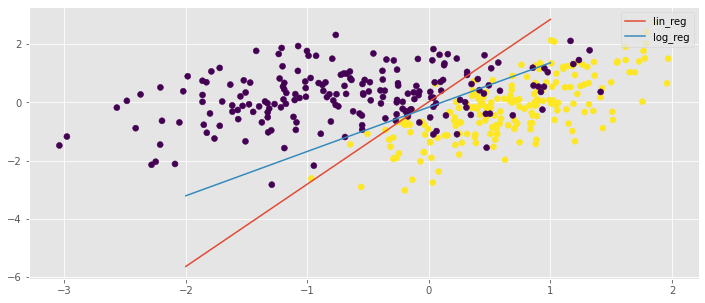

In [10]:
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
my_model = MySGDClassifier(batch_generator)
my_model.fit(X,y)
print(my_model.weights)
plot_decision_boundary(my_model)

my_model = MySGDClassifier(batch_generator, model_type = 'log_reg')
my_model.fit(X,y)
print(my_model.weights)
plot_decision_boundary(my_model)

plt.scatter(X[:,0], X[:,1], c=y)

Далее будем анализировать Ваш алгоритм. 
Для этих заданий используйте датасет ниже.

In [11]:
from sklearn.datasets import make_classification

In [12]:
X, y = make_classification(n_samples=100000, n_features=10, 
                           n_informative=4, n_redundant=0, 
                           random_state=123, class_sep=1.0,
                           n_clusters_per_class=1)

Покажите сходимости обеих регрессией на этом датасете: изобразите график  функции потерь, усредненной по $N$ шагам градиентого спуска, для разных `alpha` (размеров шага). Разные `alpha` расположите на одном графике. 

$N$ можно брать 10, 50, 100 и т.д. 

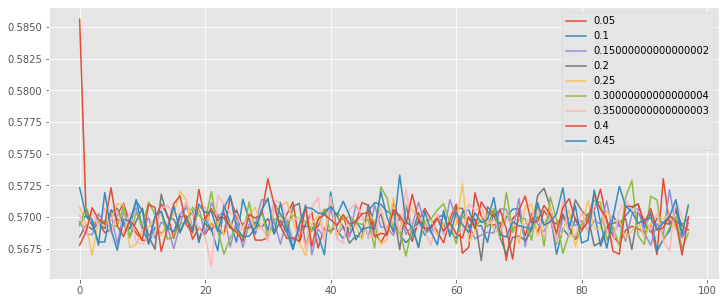

In [13]:
models = []
for i in range(1,10):
    model = MySGDClassifier(batch_generator = lambda X, y: batch_generator(X,y, batch_size=1000), alpha= i * 0.05, model_type='log_reg')
    model.fit(X,y)
    models.append(model)
for model in models:
    a = np.array(model.errors_log['loss'])
    a = a.reshape(-1, 10).mean(axis=1)
    plt.plot(a[2:], label = model.alpha)
    plt.legend(loc='upper right')

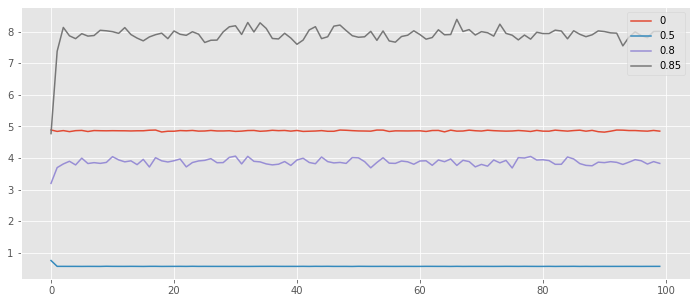

In [14]:
models = []
model1 = MySGDClassifier(batch_generator = lambda X, y: batch_generator(X,y, batch_size=1000), alpha= 0, model_type='log_reg')
model1.fit(X,y)
models.append(model1)
model1 = MySGDClassifier(batch_generator = lambda X, y: batch_generator(X,y, batch_size=1000), alpha= 0.5, model_type='log_reg')
model1.fit(X,y)
models.append(model1)
model1 = MySGDClassifier(batch_generator = lambda X, y: batch_generator(X,y, batch_size=1000), alpha= 0.8, model_type='log_reg')
model1.fit(X,y)
models.append(model1)
model1 = MySGDClassifier(batch_generator = lambda X, y: batch_generator(X,y, batch_size=1000), alpha= 0.85, model_type='log_reg')
model1.fit(X,y)
models.append(model1)
for model in models:
    a = np.array(model.errors_log['loss'])
    a = a.reshape(-1, 10).mean(axis=1)
    plt.plot(a, label = model.alpha)
    plt.legend(loc='upper right')

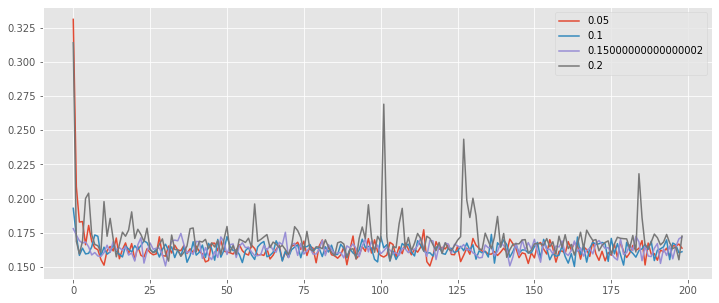

In [15]:
models = []
for i in range(1,5):
    model = MySGDClassifier(batch_generator = lambda X, y: batch_generator(X,y, batch_size=500), alpha= i * 0.05, C = 1000)
    model.fit(X,y)
    models.append(model)
for model in models:
    a = np.array(model.errors_log['loss'])
    a = a.reshape(-1, 10).mean(axis=1)
    plt.plot(a[1:], label = model.alpha)
    plt.legend(loc='upper right')

Что Вы можете сказать про сходимость метода при различных `alpha`? Какое значение стоит выбирать для лучшей сходимости?

Альфа не стоит выбирать слишком большим, но  и слишком маленьким тоже. От 0.1 до 0.3 вполне нормально

Изобразите график среднего значения весов для обеих регрессий в зависимости от коеф. регуляризации С из `np.logspace(3, -3, 10)` 

C is 1000.0 ,mean is 0.04463638014802441
C is 215.44346900318845 ,mean is 0.05434462943248146
C is 46.4158883361278 ,mean is 0.025608741893053302
C is 10.0 ,mean is 0.04122177242821094
C is 2.1544346900318843 ,mean is 0.013385339021960463
C is 0.4641588833612782 ,mean is -0.012756628807236214
C is 0.1 ,mean is -0.006240466619944452
C is 0.021544346900318867 ,mean is -0.001787202501617887
C is 0.004641588833612782 ,mean is 9.63754053861669e+51
C is 0.001 ,mean is 6.45493349430373e+127


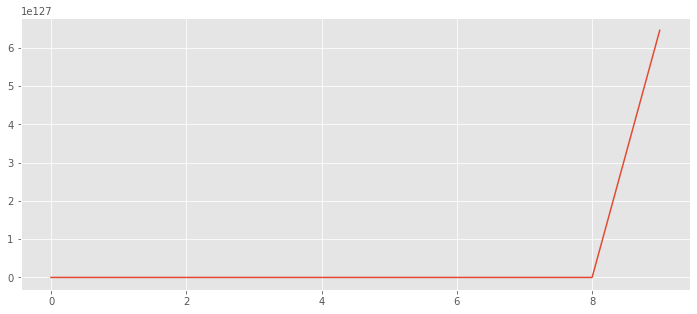

In [16]:
## Your Code Here
graph = []
for C in np.logspace(3, -3, 10):
    model = MySGDClassifier(batch_generator = lambda X, y: batch_generator(X,y, batch_size=10000), C=C)
    model.fit(X, y)
    a = np.mean(np.array(model.weights))
    print('C is',C,',mean is',a)
    graph.append(a)
plt.plot(graph)

C is 1000.0 ,mean is 0.028903478360096723
C is 215.44346900318845 ,mean is 0.022136647530100487
C is 46.4158883361278 ,mean is 0.046516974324816406
C is 10.0 ,mean is 0.02597764146272067
C is 2.1544346900318843 ,mean is 0.010100348291189913
C is 0.4641588833612782 ,mean is -0.01268091299672135
C is 0.1 ,mean is -0.006300512548715161
C is 0.021544346900318867 ,mean is -0.0017927085708310281
C is 0.004641588833612782 ,mean is 1.0090383159302969e+52
C is 0.001 ,mean is 3.4009383744116336e+127


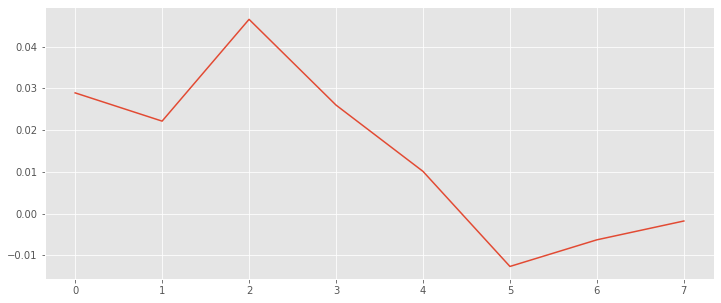

In [17]:
graph = []
for C in np.logspace(3, -3, 10):
    model = MySGDClassifier(batch_generator = lambda X, y: batch_generator(X,y, batch_size=10000), C=C)
    model.fit(X, y)
    a = np.mean(np.array(model.weights))
    print('C is',C,',mean is',a)
    graph.append(a)
plt.plot(graph[:8])

C is 1000.0 ,mean is 0.3537477167598059
C is 215.44346900318845 ,mean is 0.4347043865031942
C is 46.4158883361278 ,mean is 0.2736746531100263
C is 10.0 ,mean is 0.2772724833714667
C is 2.1544346900318843 ,mean is 0.12044102346304153
C is 0.4641588833612782 ,mean is -0.004255087244152052
C is 0.1 ,mean is -0.0021424836764631383
C is 0.021544346900318867 ,mean is -0.0005068530482811602


/home/kitty/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
/home/kitty/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
/home/kitty/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  


C is 0.004641588833612782 ,mean is 5.0267785704569155e+51
C is 0.001 ,mean is 3.632670931037624e+127


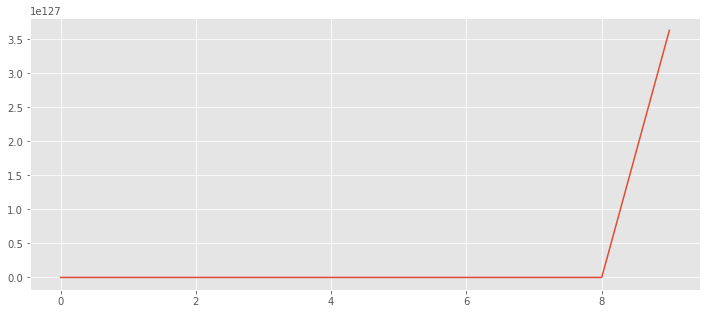

In [18]:
graph = []
for C in np.logspace(3, -3, 10):
    model = MySGDClassifier(batch_generator = lambda X, y: batch_generator(X,y, batch_size=10000), C=C, model_type = 'log_reg')
    model.fit(X, y)
    a = np.mean(np.array(model.weights))
    print('C is',C,',mean is',a)
    graph.append(a)
plt.plot(graph)

C is 1000.0 ,mean is 0.2685433013522218
C is 215.44346900318845 ,mean is 0.4036784779283695
C is 46.4158883361278 ,mean is 0.3674260630916937
C is 10.0 ,mean is 0.30608648719672843
C is 2.1544346900318843 ,mean is 0.08775539060676571
C is 0.4641588833612782 ,mean is -0.004819221100241859
C is 0.1 ,mean is -0.0021803951471327998
C is 0.021544346900318867 ,mean is -0.0005081891947993332


/home/kitty/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
/home/kitty/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
/home/kitty/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  


C is 0.004641588833612782 ,mean is 2.9994937155000355e+51
C is 0.001 ,mean is 4.10634510278703e+127


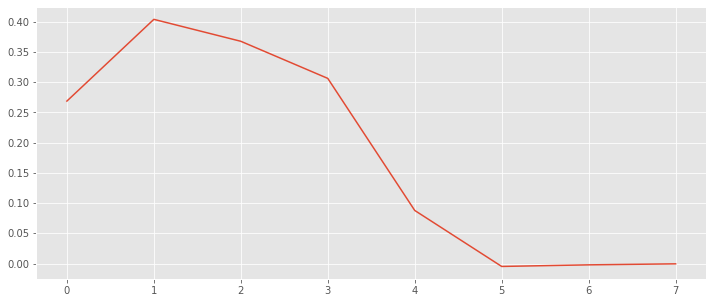

In [19]:
graph = []
for C in np.logspace(3, -3, 10):
    model = MySGDClassifier(batch_generator = lambda X, y: batch_generator(X,y, batch_size=10000), C=C, model_type = 'log_reg')
    model.fit(X, y)
    a = np.mean(np.array(model.weights))
    print('C is',C,',mean is',a)
    graph.append(a)
plt.plot(graph[:8])

Довольны ли Вы, насколько сильно уменьшились Ваши веса? 
Недоволен в случае с очень маленькими C, а так да, вполне.

# Боевое применение (4  балла)

**Защита данной части возможна только при преодолении в проекте бейзлайна Handmade baseline.**

Давайте применим модель на итоговом проекте! Датасет сделаем точно таким же образом, как было показано в project_overview.ipynb

Применим обе регрессии, подберем для них параметры и сравним качество. Может быть Вы еще одновременно с решением домашней работы подрастете на лидерборде!

In [20]:
doc_to_title = {}
with open('docs_titles.tsv') as f:
    for num_line, line in enumerate(f):
        if num_line == 0:
            continue
        data = line.strip().split('\t', 1)
        doc_id = int(data[0])
        if len(data) == 1:
            title = ''
        else:
            title = data[1]
        doc_to_title[doc_id] = title
print (len(doc_to_title))


28026


In [21]:
import pandas as pd
train_data = pd.read_csv('train_groups.csv')
traingroups_titledata = {}
for i in range(len(train_data)):
    new_doc = train_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    target = new_doc['target']
    title = doc_to_title[doc_id]
    if doc_group not in traingroups_titledata:
        traingroups_titledata[doc_group] = []
    traingroups_titledata[doc_group].append((doc_id, title, target))

In [22]:
import numpy as np
y_train = []
X_train = []
groups_train = []
for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    for k, (doc_id, title, target_id) in enumerate(docs):
        y_train.append(target_id)
        groups_train.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_train.append(sorted(all_dist, reverse=True)[0:15]    )
X_train = np.array(X_train)
y_train = np.array(y_train)
groups_train = np.array(groups_train)
print (X_train.shape, y_train.shape, groups_train.shape)

(11690, 15) (11690,) (11690,)


Подберите размер батча для обучения. Линейная модель не должна учиться дольше нескольких минут. 

Не забывайте использовать скейлер!

In [23]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

In [24]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train.shape

(11690, 15)

In [25]:
model = MySGDClassifier(batch_generator = lambda X, y: batch_generator(X,y, batch_size=100), alpha = 0.001)
model.fit(X_train, y_train)
res = model.predict(X_train)

Разбейте данные на обучение и валидацию. Подберите параметры C, alpha, max_epoch, model_type на валидации (Вы же помните, как правильно в этой задаче делать валидацию?)

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [27]:
kf = KFold(n_splits = 5)
best_accuracy = 0
best_param = []
for test_alpha in [0.001,0.005,0.01,0.02]:
    for C in np.logspace(3, -3, 10)[:8]:
        accuracy = 0
        model = MySGDClassifier(batch_generator = lambda X, y: batch_generator(X,y, batch_size=100), alpha = test_alpha, C=C)
        for train_index, test_index in kf.split(X_train):
            X_tr, X_test = X_train[train_index], X_train[test_index]
            y_tr, y_test = y_train[train_index], y_train[test_index]
            model.fit(X_tr,y_tr)
            predict = model.predict(X_test)
            accuracy += accuracy_score(y_test, predict)
        accuracy /= 5
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_param = (test_alpha,C)
print('accur',best_accuracy)   
print('alpha =',best_param[0],' C =',best_param[1])

accur 0.7877673224978614
alpha = 0.005  C = 2.1544346900318843


In [28]:
kf = KFold(n_splits = 5)
best_accuracy = 0
best_param = []
for test_alpha in [0.001,0.005,0.01,0.02]:
    for C in np.logspace(3, -3, 10)[:8]:
        accuracy = 0
        model = MySGDClassifier(batch_generator = lambda X, y: batch_generator(X,y, batch_size=100), alpha = test_alpha, C=C, model_type = 'log_reg')
        for train_index, test_index in kf.split(X_train):
            X_tr, X_test = X_train[train_index], X_train[test_index]
            y_tr, y_test = y_train[train_index], y_train[test_index]
            model.fit(X_tr,y_tr)
            predict = model.predict(X_test)
            accuracy += accuracy_score(y_test, predict)
        accuracy /= 5
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_param = (test_alpha,C)
print('accur',best_accuracy)   
print('alpha =',best_param[0],' C =',best_param[1])

/home/kitty/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
/home/kitty/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
/home/kitty/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
/home/kitty/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
/home/kitty/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
/home/kitty/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
/home/kitty/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: divide by zero

/home/kitty/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
/home/kitty/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
/home/kitty/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
/home/kitty/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
/home/kitty/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
/home/kitty/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
/home/kitty/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value enco

accur 0.787852865697177
alpha = 0.01  C = 46.4158883361278


In [29]:
test_data = pd.read_csv('test_groups.csv')
testgroups_titledata = {}
for i in range(len(test_data)):
    new_doc = test_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    title = doc_to_title[doc_id]
    if doc_group not in testgroups_titledata:
        testgroups_titledata[doc_group] = []
    testgroups_titledata[doc_group].append((doc_id, title, target))

In [30]:
y_test = []
X_test = []
groups_test = []
for new_group in testgroups_titledata:
    docs = testgroups_titledata[new_group]
    for k, (doc_id, title, target_id) in enumerate(docs):
        y_test.append(target_id)
        groups_test.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_test.append(sorted(all_dist, reverse=True)[0:15]    )
X_test = np.array(X_test)
y_test = np.array(y_test)
groups_test = np.array(groups_test)
print (X_test.shape, y_test.shape, groups_test.shape)
scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)

(16627, 15) (16627,) (16627,)


In [31]:
model = MySGDClassifier(batch_generator = lambda X, y: batch_generator(X,y, batch_size=100), alpha = 0.01, C=2.1544346900318843)
model.fit(X_train,y_train)
predict = model.predict(X_test)
print(predict.shape)
print(accuracy_score(y_test, predict))

(16627,)
0.8045949359475552


Подберите порог линейной модели, по достижении которого, Вы будете относить объект к классу 1. Вспомните, какую метрику мы оптимизируем в соревновании.  Как тогда правильно подобрать порог?

С лучшими параметрами на валидации сделайте предсказание на тестовом множестве, отправьте его на проверку на платформу kaggle. Убедитесь, что Вы смогли побить public score первого бейзлайна.

** При сдаче домашки Вам необходимо кроме ссылки на ноутбук показать Ваш ник на kaggle, под которым Вы залили решение, которое побило Handmade baseline. **

In [32]:
answer = pd.DataFrame({'pair_id': np.asarray(test_data['pair_id']), 'target': list(map(int, predict))})
answer = answer.set_index(['pair_id'])
answer.to_csv('sub.csv')

***Мой ник в Kaggle: Bogdan Alexandrov***

# Фидбек (бесценно)

* Какие аспекты обучения линейных моделей Вам показались непонятными? Какое место стоит дополнительно объяснить?

***Ваше ответ здесь***

* Здесь Вы можете оставить отзыв о этой домашней работе или о всем курсе.   

*** ВАШ ОТЗЫВ ЗДЕСЬ***